In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# On importe le csv client
dfclient = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_MySQL/CLIENT_MySQL.csv')
# On indique vouloir garder toutes les colonnes
pd.set_option('display.max_columns',None)
dfclient.head()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5
1,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0
2,100004,0,52,0,0,0,0,0,67500,0,0,12,0,1,0,0,0,11,6
3,100006,0,52,1,0,2,0,0,135000,0,0,8,8,1,0,0,1,26,6
4,100007,0,54,0,0,0,0,0,121500,0,1,1,8,1,0,0,1,11,9


In [3]:
# On importe le csv credit
dfcredit = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_MySQL/CREDIT_MySQL.csv')
# On indique vouloir garder toutes les colonnes
pd.set_option('display.max_columns',None)
dfcredit.head()

,id_credit,id_client,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien
0,2030495,271877,0,17145,17145,0,2,0,0,3
1,2802425,108129,1,607500,607500,0,5,1,0,0
2,2523466,122040,1,112500,112500,0,10,0,0,0
3,2819243,176158,1,450000,450000,0,17,0,0,0
4,1784265,202054,1,337500,337500,1,26,0,1,0


In [4]:
dfmerge = pd.merge(dfclient, dfcredit, on="id_client")
dfmerge.head()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents,id_credit,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5,1038818,0,179055,179055,0,20,1,0,5
1,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0,1810518,1,900000,900000,0,24,1,0,0
2,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0,2636178,0,337500,337500,0,27,0,0,2
3,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0,2396755,0,68809,68809,0,78,0,0,7
4,100004,0,52,0,0,0,0,0,67500,0,0,12,0,1,0,0,0,11,6,1564014,0,24282,24282,0,27,0,0,3


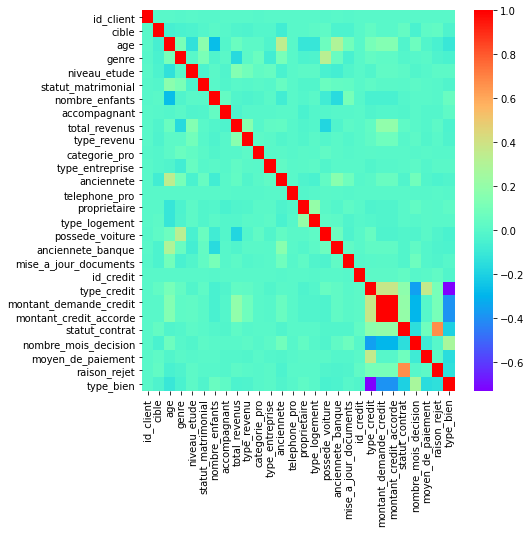

In [5]:
corrmat = dfmerge.corr() 
  
f, ax = plt.subplots(figsize =(7, 7)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [6]:
df_repayer = dfmerge[dfmerge['cible'] == 0]
df_defaulter = dfmerge[dfmerge['cible'] == 1]

In [7]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable1', 'Variable2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Variable1,Variable2,Correlation
637,montant_credit_accorde,montant_demande_credit,1.00
776,type_bien,type_credit,0.73
751,raison_rejet,statut_contrat,0.67
778,type_bien,montant_credit_accorde,0.39
777,type_bien,montant_demande_credit,0.39
608,montant_demande_credit,type_credit,0.38
636,montant_credit_accorde,type_credit,0.38
720,moyen_de_paiement,type_credit,0.36
692,nombre_mois_decision,type_credit,0.35
338,anciennete,age,0.34


In [8]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable1', 'Variable2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Variable1,Variable2,Correlation
637,montant_credit_accorde,montant_demande_credit,1.00
776,type_bien,type_credit,0.74
751,raison_rejet,statut_contrat,0.67
720,moyen_de_paiement,type_credit,0.42
777,type_bien,montant_demande_credit,0.39
778,type_bien,montant_credit_accorde,0.39
692,nombre_mois_decision,type_credit,0.37
636,montant_credit_accorde,type_credit,0.34
608,montant_demande_credit,type_credit,0.34
338,anciennete,age,0.30


In [9]:
# On importe le csv type_credit
dftype_credit = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_MySQL/type_credit.csv')

dftype_credit.head()

,id_type,type_credit
0,0,0
1,1,1
2,2,2
3,3,3


In [10]:
dfmerge1 = pd.merge(dfmerge,dftype_credit,  on="type_credit")
dfmerge1.head()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents,id_credit,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien,id_type
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5,1038818,0,179055,179055,0,20,1,0,5,0
1,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0,2636178,0,337500,337500,0,27,0,0,2,0
2,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0,2396755,0,68809,68809,0,78,0,0,7,0
3,100004,0,52,0,0,0,0,0,67500,0,0,12,0,1,0,0,0,11,6,1564014,0,24282,24282,0,27,0,0,3,0
4,100006,0,52,1,0,2,0,0,135000,0,0,8,8,1,0,0,1,26,6,2190416,0,334917,334917,0,10,0,0,7,0


In [11]:
# On importe le csv bien
dfbien = pd.read_csv('/Users/p-asalisbury/Dropbox/Mon Mac (MacBook Air de P-A)/Desktop/Chef_doeuvre/CSV_MySQL/bien.csv')

dfbien.head()

,id_bien,type_bien
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [12]:
dfmerge2 = pd.merge(dfmerge1,dfbien,  on="type_bien")
dfmerge2.head()

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenu,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents,id_credit,type_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,type_bien,id_type,id_bien
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5,1038818,0,179055,179055,0,20,1,0,5,0,5
1,100097,0,48,0,0,1,0,0,157500,0,99,8,6,1,0,0,0,9,2,1448742,0,108000,108000,0,12,1,0,5,0,5
2,100297,0,28,0,0,1,0,1,135000,0,4,2,3,1,1,0,0,7,8,1915179,0,111195,111195,0,33,1,0,5,0,5
3,100297,0,28,0,0,1,0,1,135000,0,4,2,3,1,1,0,0,7,8,2622301,0,121639,121639,0,17,1,0,5,0,5
4,100301,1,22,0,0,1,1,0,112500,0,0,8,0,1,0,0,1,8,0,1537590,0,121455,121455,0,55,0,0,5,0,5


In [17]:
dfmerge2 = dfmerge2[['id_credit', 'montant_demande_credit','montant_credit_accorde','statut_contrat','nombre_mois_decision','moyen_de_paiement','raison_rejet','id_client','id_type','id_bien']]
dfmerge2.head()

,id_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,id_client,id_type,id_bien
0,1038818,179055,179055,0,20,1,0,100002,0,5
1,1448742,108000,108000,0,12,1,0,100097,0,5
2,1915179,111195,111195,0,33,1,0,100297,0,5
3,2622301,121639,121639,0,17,1,0,100297,0,5
4,1537590,121455,121455,0,55,0,0,100301,0,5


In [18]:
dfmerge2.head()

,id_credit,montant_demande_credit,montant_credit_accorde,statut_contrat,nombre_mois_decision,moyen_de_paiement,raison_rejet,id_client,id_type,id_bien
0,1038818,179055,179055,0,20,1,0,100002,0,5
1,1448742,108000,108000,0,12,1,0,100097,0,5
2,1915179,111195,111195,0,33,1,0,100297,0,5
3,2622301,121639,121639,0,17,1,0,100297,0,5
4,1537590,121455,121455,0,55,0,0,100301,0,5


In [19]:
dfmerge2['id_type'].value_counts()

0    524858
1    293967
2     66529
Name: id_type, dtype: int64

In [20]:
dfmerge = pd.merge(dfclient, dfcredit, on="id_client")
dfmerge1 = pd.merge(dfmerge,dftype_credit,  on="type_credit")
dfmerge2 = pd.merge(dfmerge1,dfbien,  on="type_bien")
[['id_credit', 'montant_demande_credit','montant_credit_accorde',
'statut_contrat','nombre_mois_decision','moyen_de_paiement',
'raison_rejet','id_client','id_type','id_bien']]






[['id_credit',
  'montant_demande_credit',
  'montant_credit_accorde',
  'statut_contrat',
  'nombre_mois_decision',
  'moyen_de_paiement',
  'raison_rejet',
  'id_client',
  'id_type',
  'id_bien']]

In [32]:
import csv
dfmerge2.to_csv('CREDIT_MERGE_MySQL.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)